In [ ]:
from utils.tree_utils import get_activity_info,match_frag
import pandas as pd
from utils.common_utils import mapper,csvToExcel,get_mol,float_row,remove_dummy # ,df_match

dfAct = pd.read_csv('/home/data/jay/Vue-molOpt/API/RunFolder/SARM/SARM-QR071-mertkOnly_2025-08-28-16-59-35/input.csv')
dfAct['Cano_SMILES'] = dfAct['smiles']
frag = "CN(Cc1ccc2nccn2c1)c1nnc(o1)-c1ccc(OC2CCCC2)cc1" ##'CN(c1oc(-c2ccc(C3CC3)cc2)nn1)Cc1ccc2[n](ccn2)c1'

# dfAct = float_row(dfAct, cols=['IC50'])
# dfAct['matched']=dfAct.apply(lambda x: match_frag(x['Cano_SMILES'],ismarts=frag),axis=1)
# dfAct=dfAct[dfAct['matched']==1]
# print(dfAct)
get_activity_info(dfAct, frag, actCols=['IC50'], highlightDictList=[])

print(match_frag('CN(Cc1ccc2nccn2c1)c1nnc(o1)-c1ccc(OC2CCCC2)cc1','CN(c1oc(-c2ccc(C3CC3)cc2)nn1)Cc1ccc2[n](ccn2)c1'))




[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 28 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 10 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted
[14:20:43] Explicit valence for atom # 12 N, 4, is greater than permitted


match_frag CCNc1cc2n(nc(C3=CN[N](C)=C3)c2cn1)C1CC[C@@H](CC1)Oc1nccc(c1Br)C(F)(F)F CN(Cc1ccc2nccn2c1)c1nnc(o1)c1ccc(OC2CCCC2)cc1
'NoneType' object has no attribute 'GetSubstructMatches'
match_frag CCNc1cc2n(nc(-c3cnn(C)c3)c2cn1)C1CC[C@@H](CC1)OC1=CN[N](C)=C1C(F)(F)F CN(Cc1ccc2nccn2c1)c1nnc(o1)c1ccc(OC2CCCC2)cc1
'NoneType' object has no attribute 'GetSubstructMatches'
match_frag CCNc1cc2n(nc(C3=CN[N](C[C@H](O)CO)=C3)c2cn1)C1CC[C@@H](CC1)Oc1cccc(c1F)C(F)(F)F CN(Cc1ccc2nccn2c1)c1nnc(o1)c1ccc(OC2CCCC2)cc1
'NoneType' object has no attribute 'GetSubstructMatches'
match_frag CCNc1cc2n(nc(C3=CN[N](C[C@@H](O)CO)=C3)c2cn1)C1CC[C@@H](CC1)Oc1cccc(C#N)c1F CN(Cc1ccc2nccn2c1)c1nnc(o1)c1ccc(OC2CCCC2)cc1
'NoneType' object has no attribute 'GetSubstructMatches'
match_frag CCNc1cc2n(nc(C3=CN[N](C[C@@H](O)CO)=C3)c2cn1)C1CC[C@@H](CC1)Oc1ccc2C(=O)NCc2c1 CN(Cc1ccc2nccn2c1)c1nnc(o1)c1ccc(OC2CCCC2)cc1
'NoneType' object has no attribute 'GetSubstructMatches'
match_frag CCNc1cc2n(nc(C3=CN[N](C[C@@H](O)CO)=C3)c2cn

ValueError: could not convert string to float: '" 100"'

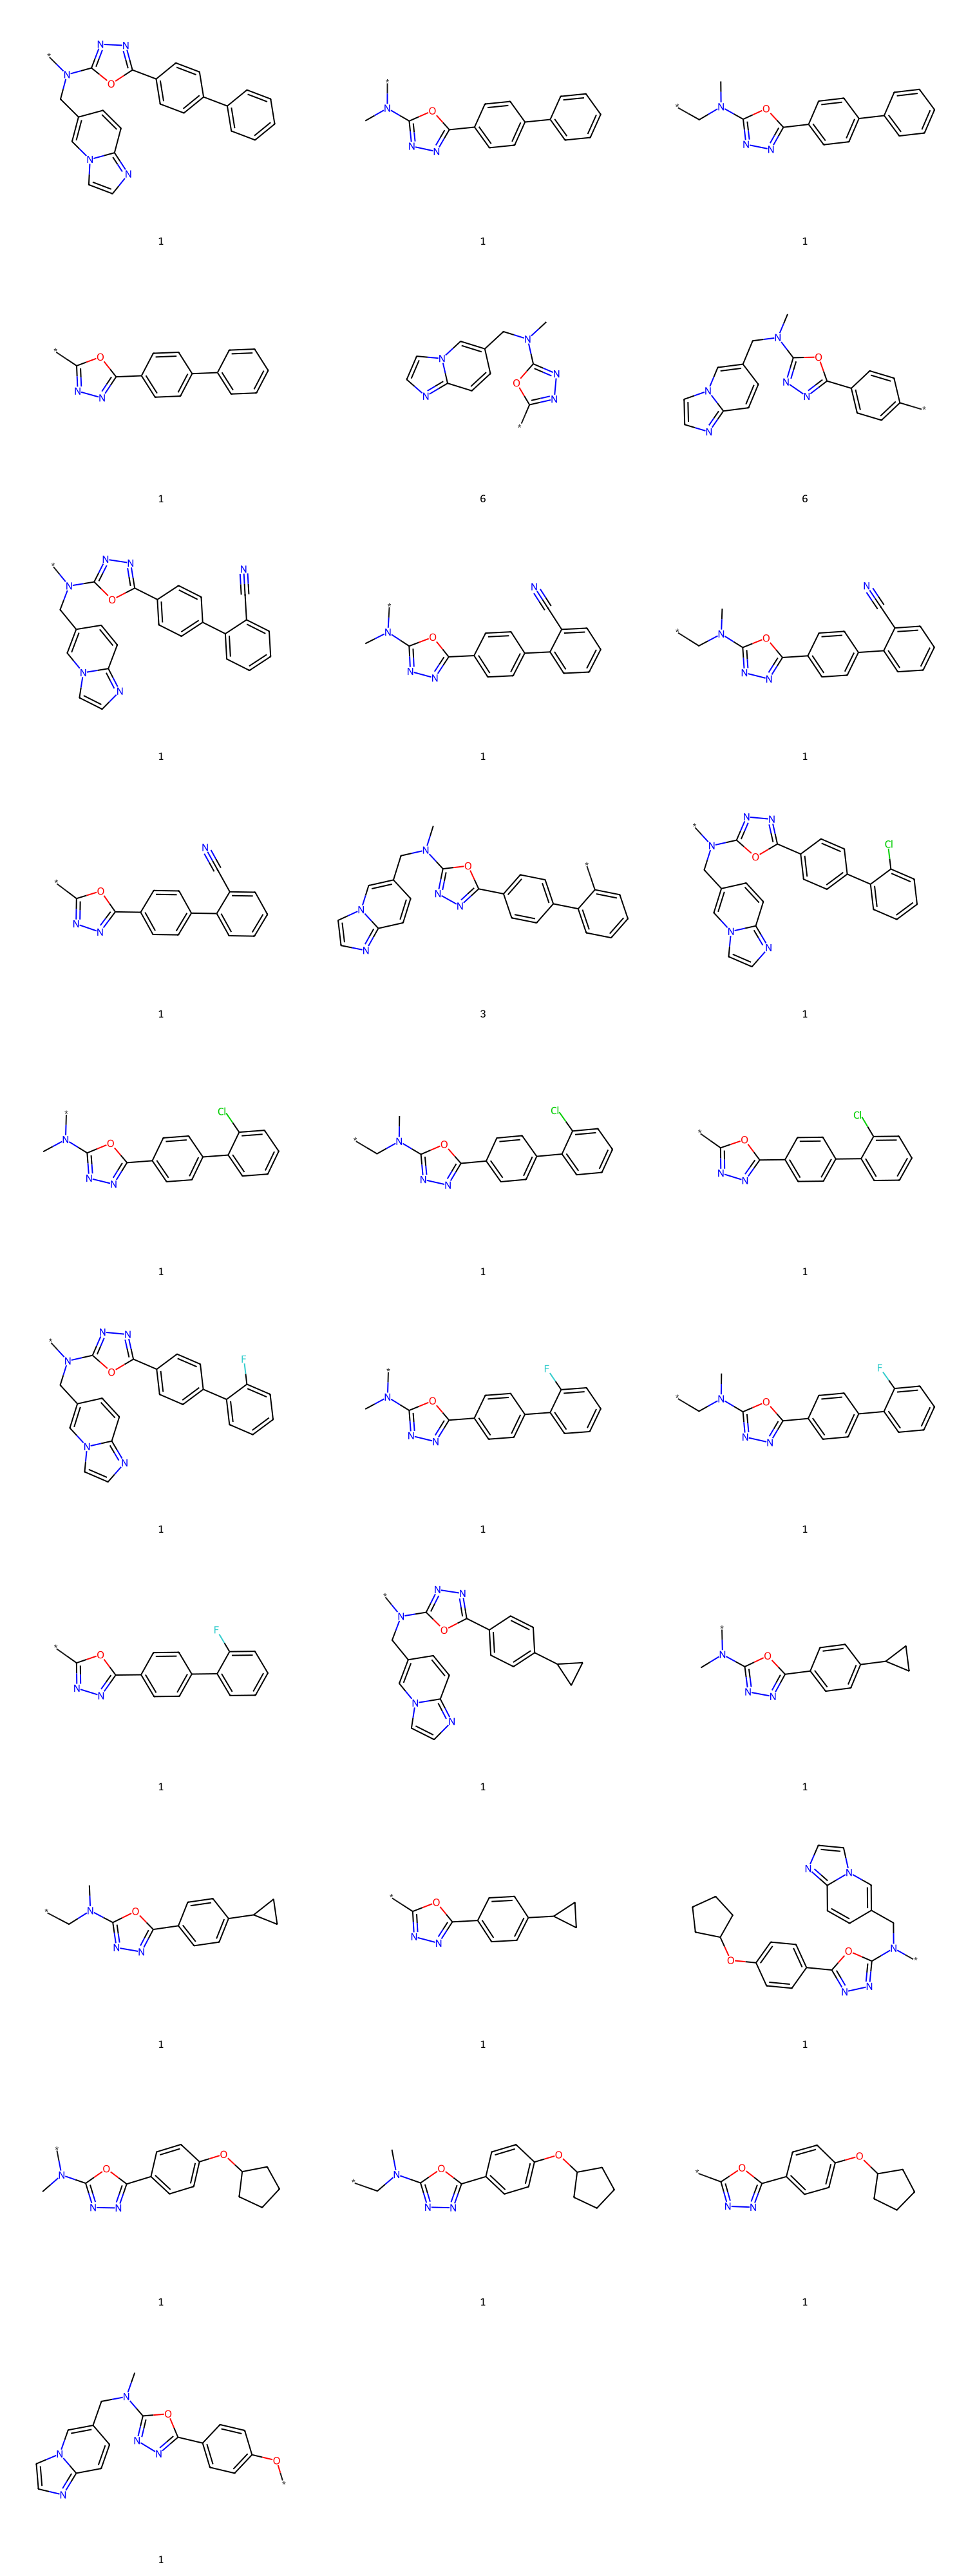

In [9]:
from utils.sarm_utils import get_core,fragmentize,create_SARM,create_SARM_MLP
from collections import Counter
from my_toolset.drawing_utils import show_mols
from my_toolset.my_utils import get_mol,compute_FP,canonic_smiles,mapper,weight

act_CPDs=['CN(Cc1ccc2nccn2c1)c1nnc(o1)-c1ccc(cc1)-c1ccccc1','CN(Cc1ccc2nccn2c1)c1nnc(o1)-c1ccc(cc1)-c1ccccc1C#N','CN(Cc1ccc2nccn2c1)c1nnc(o1)-c1ccc(cc1)-c1ccccc1Cl','CN(Cc1ccc2nccn2c1)c1nnc(o1)-c1ccc(cc1)-c1ccccc1F','CN(Cc1ccc2nccn2c1)c1nnc(o1)-c1ccc(cc1)C1CC1','CN(Cc1ccc2nccn2c1)c1nnc(o1)-c1ccc(OC2CCCC2)cc1']
act_CPDs=[canonic_smiles(x) for x in act_CPDs]

df_round1, df_round2=fragmentize(act_CPDs, n_jobs=10, drop_duplicate=False, pos_args={'RR':True, 'nRnR':True})
# print(df_round1)
fragCount = Counter(df_round1['Key'].to_list()) 
keyList = []
valList = []
for k,v in fragCount.items():
    keyList.append(k)
    valList.append(str(v))

img,svg = show_mols(smiles_mols=keyList, legends=valList)
display(img)

((17, 15, 16, 12, 1, 0, 2, 13, 14), (17, 15, 16, 12, 1, 2, 0, 13, 14))


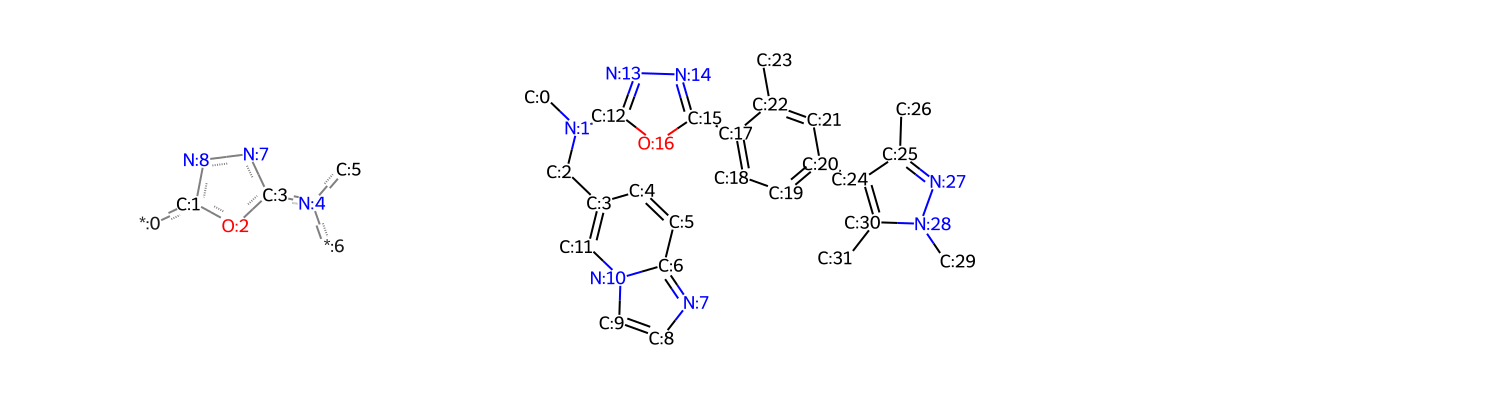

In [22]:
'''  create sar table from core and activity database  '''
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem,Draw
from rdkit.Chem import MCS
import numpy as np
import pandas as pd
import copy,re
from pathlib import Path
from utils.common_utils import mapper,get_mol,compute_FP,mol_with_atom_index,get_number_from_string, compute_sim
from utils.sarm_utils import has_match
from functools import partial
from functools import reduce
from pandarallel import pandarallel
from my_toolset.drawing_utils import show_mols
from my_toolset.my_utils import canonic_smiles
import re

from collections import Counter
import openpyxl
from openpyxl.drawing.image import Image 
from openpyxl.drawing.spreadsheet_drawing import AnchorMarker
import re,copy
import shutil
import os,sys

coreSmi = '[*]c1oc(N(C)[*])nn1'

mol=Chem.MolFromSmiles('CN(Cc1ccc2nccn2c1)c1nnc(o1)-c1ccc(cc1C)-c1c(C)nn(C)c1C')
# Set the 'molAtomMapNumber' property for each atom to its index
for atom in mol.GetAtoms():
    atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
# mol=Chem.AddHs(mol)
smart_mol = Chem.MolFromSmarts(coreSmi)
for atom in smart_mol.GetAtoms():
    atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
matches = mol.GetSubstructMatches(smart_mol, uniquify=False) #,useQueryQueryMatches=True, uniquify=False,useChirality=True

print(matches)


png,svg = show_mols([smart_mol, mol])
display(png)

